# PC5228 Quantum Information and Quantum Computation

## Qiskit Workshop (Part 01)

Course instructor: Prof. Dagomir Kaszlikowski

Workshop instructor: Kelvin Onggadinata

Contact: kelvin.onggadinata@u.nus.edu

## Introduction to Qiskit

In this workshop, we will learn coding with `Qiskit`: how to initialize states, implement basic gates, perform measurements, and run a circuit to a real IBM quantum devices.

**Contents**

0. [IBM Quantum Experience](#ibm)
1. [Single-qubit states](#1qubit)
2. [Elementary gates](#gates)
3. [Measurements](#meas)
4. [Sending jobs to IBM's quantum computer](#job)
6. [Mach-Zehnder Interferometer](#mz)

**Resources**

- Qiskit textbook: https://qiskit.org/textbook/preface.html

- Coding with Qiskit Series on Qiskit YouTube channel: https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY

If you have not used Jupyter notebooks before, take a look at the following video to quickly get started: https://www.youtube.com/watch?v=jZ952vChhuI

## Section #0: IBM Quantum Lab<a id='ibm'></a>

Signing up to IBM Quantum Experience and accessing the Jupyter Notebook.

1. Go to https://quantum-computing.ibm.com/. If this is your first time, create an IBMid account. You will be assigned an IBMid (API token) that will be necessary for sending a job to one of IBM's quantum computer.
2. To access the Jupyter Notebook, go to the Application Switcher located on the top right and go to Learning>Lab. There you can open and save Jupyter Notebook where you can write the qiskit code and send jobs to IBM's quantum computer. You can also check the progress of the job that you sent.
3. You can also find IBM Quantum Composer, which is a drag and drop quantum circuit builder with a lot of utilities to inspect step-by-step the working mechanisms of your circuit. 


## Section #1: Single-qubit states<a id='1qubit'></a>

In lecture, you learned that single qubit states can be written down generally as 

$$\sqrt{p}\vert0\rangle + e^{i\phi}\sqrt{1-p}\vert1\rangle$$

Here, $p$ is the probability that a measurement of the state in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $0$, and $\phi$ is the phase between the two computational basis states. 

Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.

Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

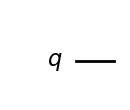

In [116]:
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

The above quantum circuit does not contain any gates. Therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state. 

To see this clearly, let's create the statevector $\vert0\rangle$. In `Qiskit`, you can do this using the following:

In [117]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')

You can see what's contained in the object `sv`:

In [118]:
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


The vector itself can be found by writing

In [119]:
sv.data

array([1.+0.j, 0.+0.j])

As you can see, the above matches what you learned in lecture. Recall that $$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [120]:
new_sv = sv.evolve(mycircuit)

Once again, you can look at the new statevector by writing

In [121]:
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


As you can see, the statevector hasn't changed. Recall the concept of state projection that you learned in lecture. You can compute the projection of `new_sv` onto `sv` by writing

In [122]:
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv)

1.0

As you can see, the projection of `new_sv` onto `sv` is 1, indicating that the two states are identical. You can visualize this state using the `qsphere` by writing

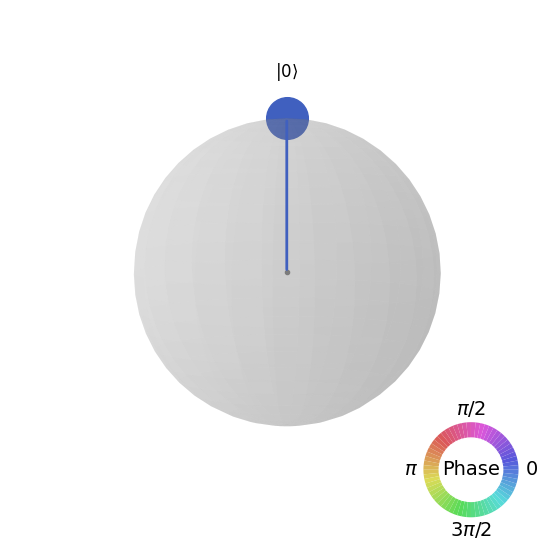

In [123]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv.data)

As you learned in lecture 1, applying an $X$ gate flips the qubit from the state $\vert0\rangle$ to the state $\vert1\rangle$. To see this clearly, we will first create a single-qubit quantum circuit with the $X$ gate.

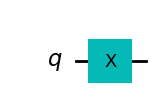

In [124]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw('mpl')

Now, we can apply this circuit onto our state by writing

In [125]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


As you can see, the statevector now corresponds to that of the state $\vert1\rangle$. Recall that

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

Now, the projection of `new_sv` onto `sv` is 

In [126]:
state_fidelity(new_sv, sv)

0.0

This is not surprising. Recall from the lecture that the states $\vert0\rangle$ and $\vert1\rangle$ are orthogonal. Therefore, $\langle0\vert1\rangle = 0$. The state can be shown on the `qsphere` by writing

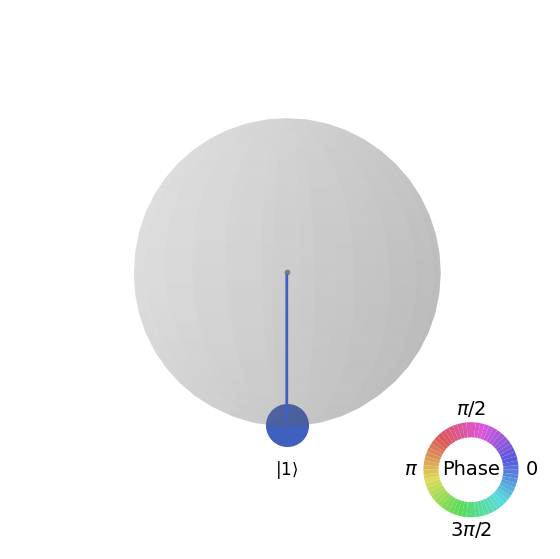

In [127]:
plot_state_qsphere(new_sv.data)

Similarly, we can create the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$
by applying a Hadamard gate as you learned in lecture. Here is how we can create the state and visualize it in `Qiskit`:

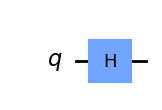

In [128]:
sv = Statevector.from_label('0')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


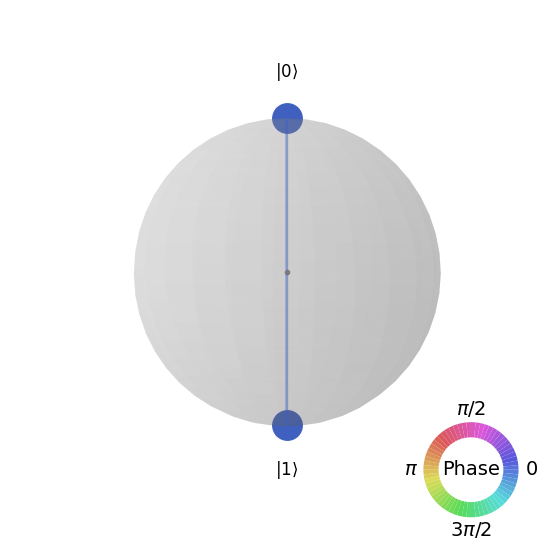

In [129]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

As you can see above, the state has equal components of $\vert0\rangle$ and $\vert1\rangle$. The size of the circle is proportional to the probability of measuring each basis state in the statevector. As a result, you can see that the size of the circles is half of the size of the circles in our previous visualizations.

Recall from lecture that we can also create other superpositions with different phase. Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


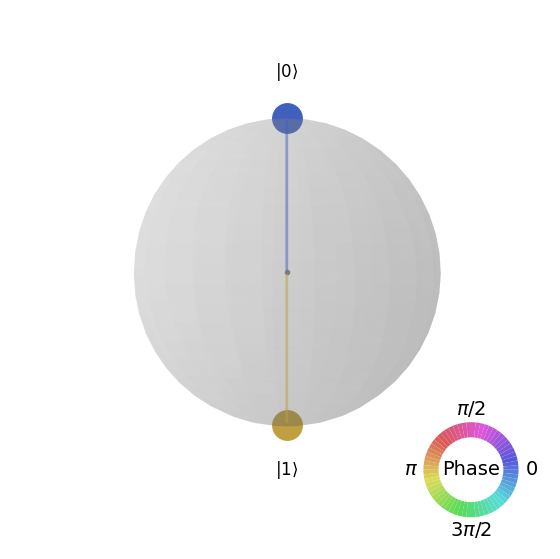

In [130]:
sv = Statevector.from_label('1')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)

new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

This time, the bottom circle, corresponding to the basis state $\vert1\rangle$ has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

Other phases can also be created by applying different gates.
Other directions in the sphere are utilized in visualizing multi-qubit state ($|00\rangle, |11\rangle$ on the vertical line, $|10\rangle,|01\rangle$ in the horizontal line).

A more general way to initialize a statevector is to insert the array of the statevector into `Statevector`. For instance, to initialize $\sqrt{0.3}|0\rangle + \sqrt{0.7}|1\rangle$, we can create the statevector by inputting the vector $[\sqrt{0.3}, \sqrt{0.7}]$ directly

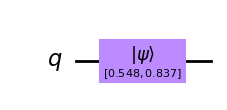

In [131]:
from numpy import sqrt, pi
sv2 = Statevector([sqrt(0.3), sqrt(0.7)])
mycircuit2 = QuantumCircuit(1)
mycircuit2.initialize(sv2)
mycircuit2.draw('mpl')

There are mutiple ways to visualize the state. Another common way is to visualize the Bloch vector of the state by using the function `plot_bloch_multivector` or `plot_bloch_vector`

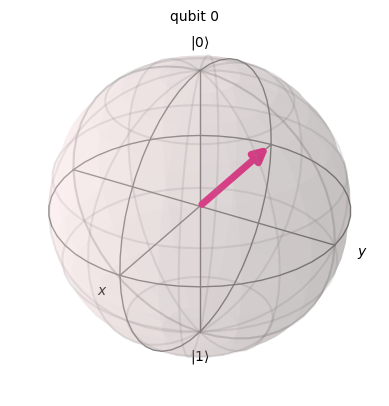

In [132]:
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector

plot_bloch_multivector(new_sv) #Use this if the input is a Statevector

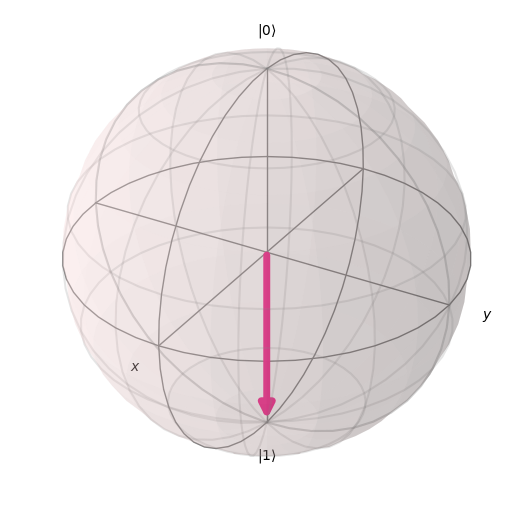

In [133]:
import numpy as np
plot_bloch_vector([0,0,-1]) #Use this if the input is Bloch vector

### Density matrix

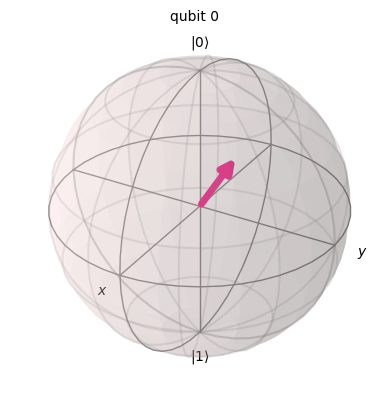

In [134]:
from qiskit.quantum_info import DensityMatrix

rho = DensityMatrix([[0.853553, 0.201024-0.25*1j], 
                    [0.201024+0.25*1j, 0.146447]])

plot_bloch_multivector(rho)

We will now see some elementary gates that make up many of the quantum algorithms.

## Section #2: Elementary single qubit gates<a id='gates'></a>

Gates are representation of the operation that transforms the state of a qubit. We will now see some elementary gates for a single qubit system.

### The Pauli gates

Pauli gates are a set of three complex matrices that are Hermitian, involuntary (self-inverse) and unitary. Their matrix representation in the computational basis is given by

$$X = |0\rangle\langle 1| + |1\rangle\langle 0| = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}$$

$$Y = -i|0\rangle\langle 1| + i|1\rangle\langle 0| = \begin{bmatrix}0 & -i \\ i & 0\end{bmatrix}$$

$$Z = |0\rangle\langle 0| - |1\rangle\langle 1| = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$$

Let us first see the effect of the X-gate:

$$X|0\rangle = |1\rangle\, ,  \qquad X|1\rangle = |0\rangle$$

We can see that the X-gate acts like a NOT-gate in the computational basis (also known as bit flip). This gate is also equivalent to rotation around the $\hat{x}$-axis by $\pi$.

Now let us see the effect of the Y-gate:

$$Y|0\rangle = i|1\rangle\, ,  \qquad Y|1\rangle = -i|0\rangle$$

The effect of Y-gate is then equivalent to a bit and phase flip.

The Pauli gates together with the identity operator makes up a basis for $2\times 2$ Hermitian matrices. We will now see the implementation of the Pauli gates in the quantum circuit.

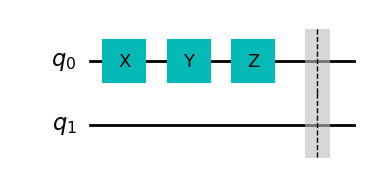

In [135]:
qctest = QuantumCircuit(2)

qctest.x(0)
qctest.y(0)
qctest.z(0)

qctest.barrier()

qctest.draw('mpl')

### Hadamard and P-gate

We have seen briefly the effect of the Hadamard gate. The matrix representation to this gate is given by

$$H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$$

Its effect as we have seen is to create superposition:

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\, ,\qquad H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

The P-gate (phase gate) is a parameterized gate (by real number $\phi$) that performs rotation of $\phi$ around the $\hat{z}$-axis direction. The matrix representation is given by

$$P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}$$

Its effect is to create phase on a superposition state. For example,

$$P|+\rangle = P\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle + e^{i\phi}|1\rangle)$$

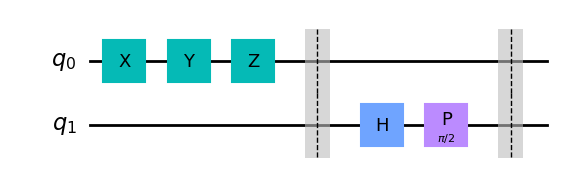

In [136]:
import numpy as np
from numpy import sqrt, pi

qctest.h(1)
qctest.p(pi/2, 1)

qctest.barrier()

qctest.draw('mpl')

### U-gate and rotation gates

Qiskit is also equiped with the U-gate which is the most general form of the single-qubit gate parameterized in the following form

$$U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}$$

Another important set of gates is the parameterized rotation gate around the standard direction:

$$RX(\theta) = \exp(-iX\theta/2) = \begin{bmatrix}\cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}$$

$$RY(\theta) = \exp(-iY\theta/2) = \begin{bmatrix}\cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}$$

$$RZ(\theta) = \exp(-iZ\theta/2) = \begin{bmatrix}\exp(-i\theta/2) & 0 \\ 0 & \exp(i\theta/2)
\end{bmatrix}$$

The $\theta$ corresponds to the angle of rotation in the Bloch sphere. For example, 

$$RY(\frac{\pi}{2})|0\rangle = |+\rangle$$

As an exercise for yourself, you can show that any unitary $U$ can be constructed from successive applications of the rotation gates.

Below, we will see how the rotation gates are applied. There are two main arguments that is needed to be inserted in the function. Namely, the first is the angle of rotation (in radians) and the second is the quantum register that the gate is to be applied to.

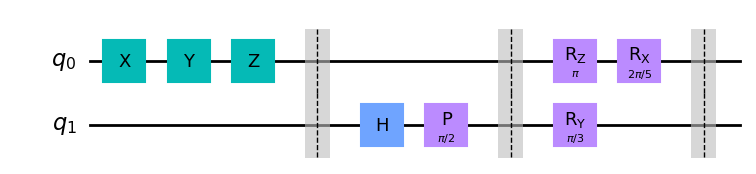

In [137]:
qctest.rz(pi, 0)

qctest.ry(pi/3, 1)

qctest.rx(2*pi/5, 0)

qctest.barrier()

qctest.draw('mpl')

## Section 4: Measurements<a id='meas'></a>

In the above example, we simulated the action of a measurement by sampling counts from the statevector. A measurement can explicitly be inserted into a quantum circuit as well. Let us a a few examples on several simple circuits.

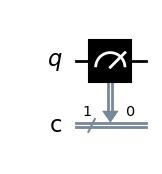

In [138]:
mycircuit = QuantumCircuit(1,1)
mycircuit.measure(0, 0)

mycircuit.draw('mpl')

Two new features appeared in the circuit compared to our previous examples. 

- First, note that we used a second argument in the `QuantumCircuit(1,1)` command. The two argument says that we will be creating a quantum circuit that contains one qubit (the first argument), and one classical bit (the second argument).
- Second, note that the `measure` command also takes two arguments. The first argument is the set of qubits that will be measured. The second is the set of classical bits onto which the outcomes from the measurements of the qubits will be stored. The number of qubits and the number of classical bits should be the same so no information overlap or erasure occurs.

To obtain the measurement results, we will use `Qiskit`'s built-in `Aer` simulators to run the circuit. To get the measurement counts, we can use the following code:

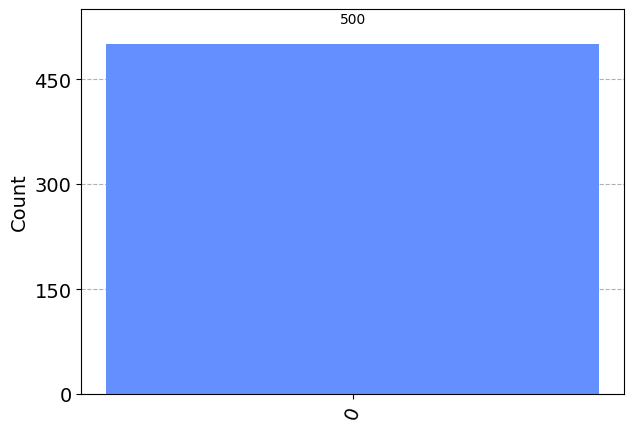

In [139]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=500).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

Let us look at measurement on a more non-trivial state

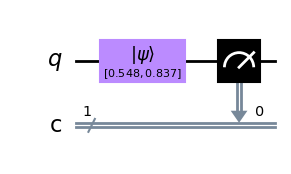

In [140]:
sv2 = Statevector([sqrt(0.3), sqrt(0.7)])
mycircuit2 = QuantumCircuit(1,1)
mycircuit2.initialize(sv2)
mycircuit2.measure(0,0)

mycircuit2.draw('mpl')

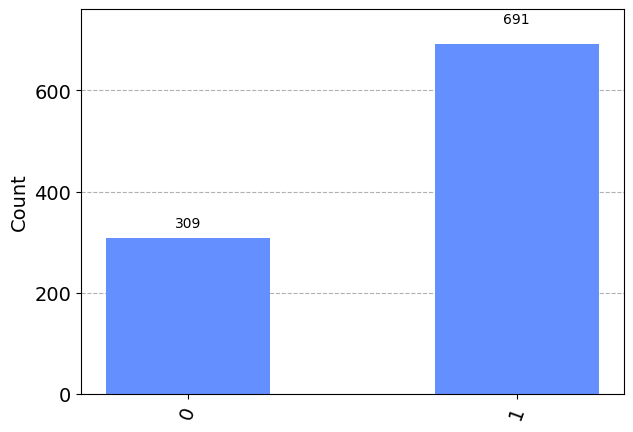

In [141]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit2, simulator, shots=1000).result()
counts = result.get_counts(mycircuit2)
plot_histogram(counts)

### Measurements on a different basis

Simulating a measurement on an arbitrary basis can also be achieved easily in Qiskit. Suppose that the new basis you want to perform the new measurement is given by $\{|v_0\rangle, |v_1\rangle\}$ where it is related to the canonical basis by some unitary:$$|v_0\rangle = U|0\rangle$$ $$|v_1\rangle = U|1\rangle$$

Using the Born rule, performing a measurement in this new basis on the state $|\psi\rangle$ can be easiily calculated as $$p(v_0|\psi) = \text{Tr}[|\psi\rangle\langle\psi ||v_0\rangle \langle v_0 |]$$ $$p(v_1|\psi) = \text{Tr}[|\psi\rangle\langle\psi ||v_1\rangle \langle v_1 |]$$

However these probabilities are exactly equal if we rotate $|\psi\rangle$ by $U^\dagger$ and perform measurement in the canonical basis: $$p(0|U^\dagger\psi) = \text{Tr}[U^\dagger|\psi\rangle\langle\psi |U^\dagger|0\rangle \langle 0 |] = p(v_0|\psi)$$ $$p(1|U^\dagger\psi) = \text{Tr}[|U^\dagger\psi\rangle\langle\psi |U^\dagger|1\rangle \langle 1 |]=p(v_1|\psi)$$ 

Since the measurement in `Qiskit` is in the canonical basis as a default, we follow the reasoning above to get the measurement probabilities in another basis.

For example, to perform measurement in the $\{|\pm\rangle\}$ basis, we already know that $|+\rangle = H|0\rangle$ and $|-\rangle = H|1\rangle$. Thus, inserting $H^\dagger=H$ will correspond to measurement in the $\{|\pm\rangle\}$ basis.

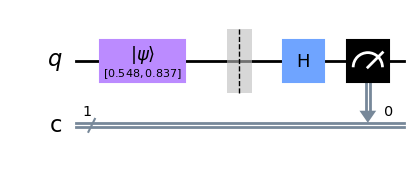

In [142]:
sv2 = Statevector([sqrt(0.3), sqrt(0.7)])
mycircuit2 = QuantumCircuit(1,1)
mycircuit2.initialize(sv2)

mycircuit2.barrier()

mycircuit2.h(0)
mycircuit2.measure(0,0)

mycircuit2.draw('mpl')

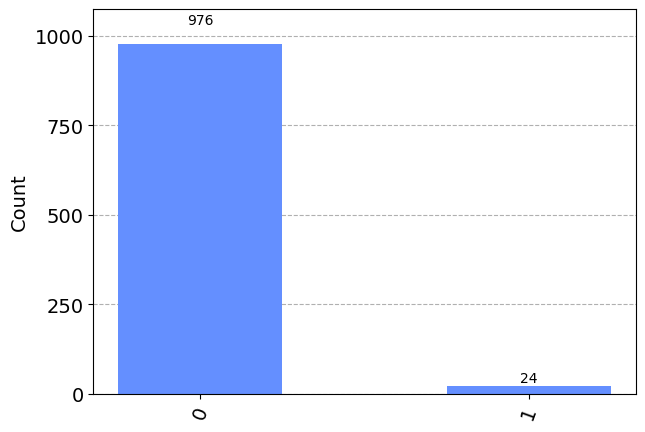

In [143]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit2, simulator, shots=1000).result()
counts = result.get_counts(mycircuit2)
plot_histogram(counts)

### Parameterized gate

We can also parameterized the input of the circuits such that a range of values can be inserted in the circuits. This is done by creating a parameterized circuit.

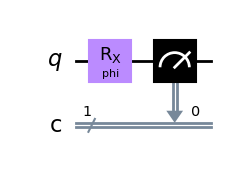

In [144]:
from qiskit.circuit import Parameter

phi = Parameter('phi')

qc_para = QuantumCircuit(1,1)

qc_para.rx(phi, 0)

qc_para.measure([0],[0])

qc_para.draw(output='mpl')

You can see that the RX gate now has a generic 'phi' as the rotation angle. The list of values to be inserted is in the format of dictionary.

In [145]:
phi_range = np.linspace(0, pi, 5)

circuits = [qc_para.bind_parameters({phi: phi_val}) for phi_val in phi_range]

In [146]:
phi_range

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

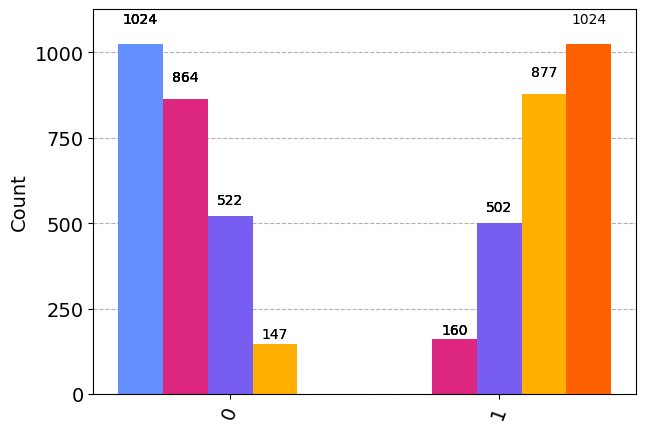

In [147]:
backend = Aer.get_backend('qasm_simulator')

from qiskit import transpile
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

plot_histogram(counts)

## Section #5: Sending jobs to IBM's quantum computer<a id='job'></a>

In this section, we will see how to call for one of IBM's quantum computer and send jobs from the circuit we created.

In [95]:
# First, see what devices we are allowed to use by loading our saved accounts
from qiskit import IBMQ
import qiskit.tools.jupyter # import handy jupyter tools for viewing backend details and monitoring job status
%qiskit_job_watcher # You should see a floating tab "IBMQ Jobs" appear on the top left corner

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

ibmqfactory.load_account:WARNING:2023-08-29 05:11:23,749: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [96]:
# get the least-busy backend at IQX, this step may take up to one minute
from qiskit.providers.ibmq import least_busy

device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                   not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [100]:
# Submit a job to IQX to run the circuit on a real device
job_exp = execute(mycircuit2, backend=device, shots=1000)

In [98]:
# The job may take a few minutes to run. 
# You can note down the `JOB_ID` (shown in the job watcher or on IQX) and retrieve the job later.
# This works even after you shutdown the kernel of this Jupyter notebook.

device = provider.get_backend('ibmq_quito')
job_exp = device.retrieve_job('cjm53lnijvusg3rqukug')

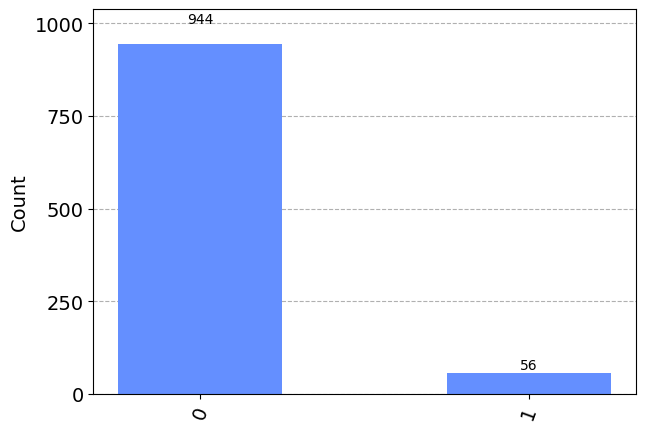

In [99]:
plot_histogram(job_exp.result().get_counts())

The circuit that was sent to the IBM quantum computer is measurement of $\sqrt{0.3}|0\rangle + \sqrt{0.7}|1\rangle$ on the x-basis. Compared to the simulator's result, one can see that outcome is not as close as the simulator. As the number of qubits are used to run in the IBM Quantum Computer, one can expect it to have more noise and inaccuracy compared to the internal simulator.

## Section #5: Mach-Zehnder Interferometer<a id='mz'></a>

In this section, we are going to implement Mach-Zehnder interferometer using quantum circuits in Qiskit and run expriments on real IBM Quantum devices.

<img src="https://www.researchgate.net/profile/Chandralekha_Singh/publication/274730065/figure/fig7/AS:317384738000897@1452681826164/Mach-Zehnder-interferometer-setup-with-a-phase-shifter-in-the-upper-path.png" alt="MZI Instrument" width="500"/>

Recall from the lecture, Mach-Zehnder interferometer consists of beam splitters and phase shifters in traditional quantum optics setup. To implement the same experiment in quantum circuits, you will need to 

1. Replace beam splitters with quantum gates: Hadamard
2. Replace phase shifters with quantum gates: Rotation around z

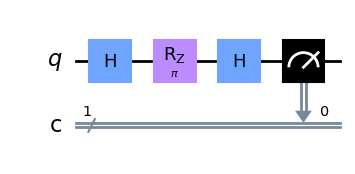

In [105]:
# Implement Mach-Zehnder interferometer in quantum circuit, `mz`

import numpy as np
from numpy import pi
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import BasicAer
from qiskit.quantum_info.operators import Operator

mz = QuantumCircuit(1,1)

mz.h(0)

phi = pi
mz.rz(phi, 0)

mz.h(0)
mz.measure([0],[0])

mz.draw(output='mpl') # Visualize the circuit

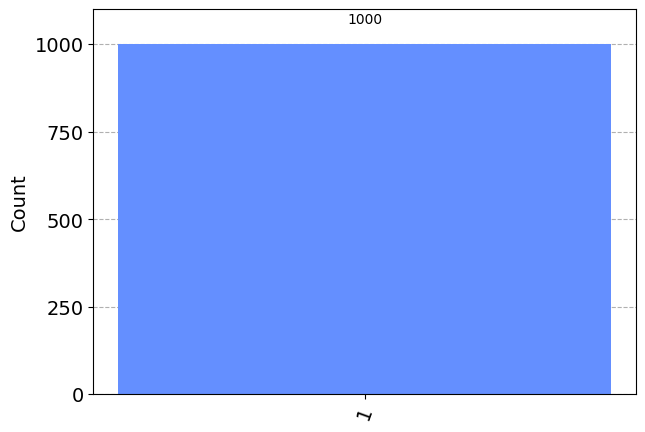

In [106]:
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import Aer

result = execute(mz, backend=QasmSimulator(), shots=1000).result()
plot_histogram(result.get_counts())

# If the circuit is correct, you should see approximately
# 50% 0 and 50% 1 for phi = pi/2
# 100% 0 for phi = 0
# 100% 1 for phi = pi

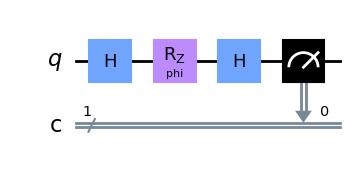

In [107]:
# Implement Mach-Zehnder interferometer in quantum circuit, `mz_para` with parameter `phi`

mz_para = QuantumCircuit(1,1)

phi = Parameter('phi')
mz_para.h(0)
mz_para.rz(phi, 0)

mz_para.h(0)
mz_para.measure([0],[0])

mz_para.draw(output='mpl') # Visualize the circuit

In [56]:
# Run circuit on IBM Quantum Computer

from qiskit import IBMQ
import qiskit.tools.jupyter # import handy jupyter tools for viewing backend details and monitoring job status
%qiskit_job_watcher # You should see a floating tab "IBMQ Jobs" appear on the top left corner

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

ibmqfactory.load_account:WARNING:2023-08-28 10:46:50,637: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [57]:
# get the least-busy backend at IQX, this step may take up to one minute
from qiskit.providers.ibmq import least_busy

device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                   not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [108]:
# Create a list of parameter values to pass to `execute` on a real device
# The format of `phi_dict_list` is a list of dictionaries
# For example, phi_dict_list = [{phi: 0}, {phi:pi/2}, {phi:pi}]

n = 30
phi_list = np.linspace(0,4*pi, n)
phi_dict_list = []
for phi_val in phi_list:
    phi_dict_list = np.append(phi_dict_list, {phi: phi_val})
phi_dict_list = list(phi_dict_list)
shots=1000

In [109]:
# Submit a job to IQX to run the circuit on a real device

shots=1000

### Uncomment the below line if a new execution wants to be made and comment out the last line
job_exp = execute(mz_para, parameter_binds=phi_dict_list, backend=device, shots=shots)

In [110]:
# The job may take a few minutes to run. 
# You can note down the `JOB_ID` (shown in the job watcher or on IQX) and retrieve the job later.
# This works even after you shutdown the kernel of this Jupyter notebook.

device = provider.get_backend('ibmq_quito')
job_exp = device.retrieve_job('cjm7mcs4jk0qbkt48g8g')

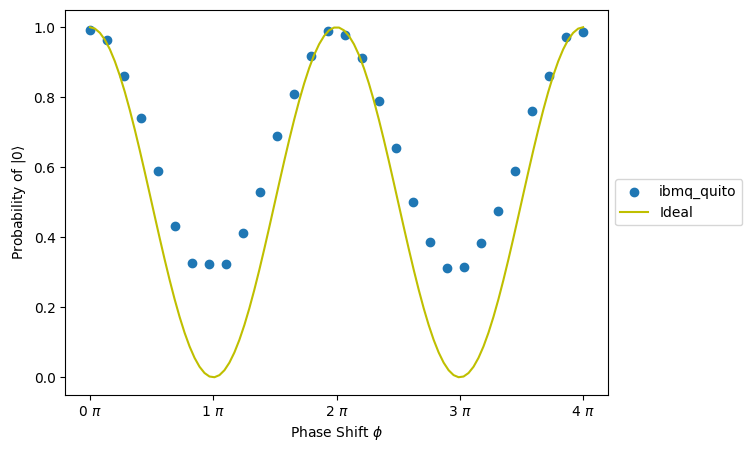

In [111]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure
fig, ax = plt.subplots(figsize=(7, 5))

# Plot experimental results
x = np.linspace(0,4,n)
visibility = {}
y = [d['0']/shots for d in job_exp.result().get_counts()]
ax.scatter(x,y, label=f"{job_exp.backend().name()}")

# Plot ideal results
ideal_x = np.linspace(0,4,100)
ideal_y = 1/2 * (1 + np.cos(ideal_x * pi))
ax.plot(ideal_x, ideal_y, 'y', label='Ideal')

# Add legend and axes labels
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel(r'Probability of $|0\rangle$')
ax.set_xlabel('Phase Shift $\phi$')

# Add pi in x ticks 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

Let's calculate the fringe visibility to determine the quality of the interference:

$$V=\frac{I_{\max }-I_{\min }}{I_{\max }+I_{\min }}$$


In [112]:
I_max = max(y)
I_min = min(y)
V = (I_max - I_min)/(I_max + I_min)
print(V)

0.5211051419800461


$V = 1$ if the intereference is perfect. But as you can see from your calculations, the interference in our experiment is not perfect.

End of part 01